In [11]:
from opendssdirect import dss
dss('Redirect "4Bus-YY-Bal.DSS"')
from scipy.sparse import csc_matrix

dss.run_command("Solve")
dss.run_command("vsource.source.enabled=no")

systemY = csc_matrix(dss.YMatrix.getYsparse())
print(systemY)

  (0, 0)	(4.942478942628483-15.717288167962273j)
  (1, 0)	(-0.08531480751782206+0.3380254115683565j)
  (2, 0)	(0.3134552298472527+0.017910889079245762j)
  (3, 0)	(-1.2844371248072728+2.6635563193504797j)
  (4, 0)	(0.6239454188915727-0.9141138573916585j)
  (5, 0)	(0.225175381526498-0.593999120041906j)
  (0, 1)	(-0.08531480751782206+0.3380254115683565j)
  (1, 1)	(5.094676259722679-15.813888000144328j)
  (2, 1)	(0.15628134837635083+0.14896485437054952j)
  (3, 1)	(0.6239454188915727-0.9141138573916585j)
  (4, 1)	(-1.4366344419014685+2.760156209216816j)
  (5, 1)	(0.38234926299739974-0.7250531737109641j)
  (0, 2)	(0.3134552298472527+0.017910889079245762j)
  (1, 2)	(0.15628134837635083+0.14896485437054952j)
  (2, 2)	(4.812260867763454-15.624627338530368j)
  (3, 2)	(0.225175381526498-0.593999120041906j)
  (4, 2)	(0.38234926299739974-0.7250531737109641j)
  (5, 2)	(-1.1542190499422436+2.5708954369615213j)
  (0, 3)	(-1.2844371248072728+2.6635563193504797j)
  (1, 3)	(0.6239454188915727-0.914113857

In [27]:
import numpy as np
# Retrieve the bus voltages as a flat list of numbers.
# The returned list is arranged as: [V1_re, V1_im, V2_re, V2_im, ...]
voltages_flat = dss.Circuit.AllBusVolts()

# Convert the flat list into a complex voltage array.
# The real parts are every other value starting at index 0, and imaginary parts are at index 1, 3, 5, ...
V_complex = np.array(voltages_flat[0::2]) + 1j * np.array(voltages_flat[1::2])

# Now compute the magnitude and phase angle (in degrees)
V_mag = np.abs(V_complex)
# angle in degrees
V_ang = np.angle(V_complex, deg=True)

print("Bus Voltages (complex):")
print(V_complex)
print("Voltage Magnitudes (V):")
print(V_mag)
formatted_angles = [f"{angle:0.2f}" for angle in V_ang]
print("Voltage Angles (deg):", formatted_angles)

Bus Voltages (complex):
[ 7199.42163607-1.18576646e-01j -3599.84017704-6.23474188e+03j
 -3599.44449758+6.23487911e+03j  7163.55684676-1.76100839e+01j
 -3575.13732468-6.14609683e+03j -3461.71297605+6.17803483e+03j
  2303.64776187-9.08762924e+01j -1248.54050304-1.87730015e+03j
  -923.4746068 +1.99981643e+03j  2169.25269868-1.56412722e+02j
 -1155.97056483-1.54514294e+03j  -407.39482976+1.78681130e+03j]
Voltage Magnitudes (V):
[7199.42163705 7199.36494248 7199.28595291 7163.57849205 7110.28220922
 7081.77739608 2305.43954839 2254.57517624 2202.74172332 2174.88441313
 1929.69806976 1832.66613499]
Voltage Angles (deg): ['-0.00', '-120.00', '120.00', '-0.14', '-120.19', '119.26', '-2.26', '-123.63', '114.79', '-4.12', '-126.80', '102.84']


In [3]:
print(systemY)
 # avoid, this is a dense matrix (memory intensive)
systemYD = csc_matrix(dss.Circuit.SystemY())
import numpy as np
systemYD = np.array(systemY.todense())

  (0, 0)	(344.55286862859367-1240.4295968513904j)
  (1, 0)	(30.703365440148822+10.912554481334663j)
  (2, 0)	(31.102135477513894+10.592439958845551j)
  (3, 0)	(-1.2844371248072728+2.6635563193504797j)
  (4, 0)	(0.6239454188915727-0.9141138573916585j)
  (5, 0)	(0.225175381526498-0.593999120041906j)
  (0, 1)	(30.703365440148822+10.912554481334663j)
  (1, 1)	(344.70506594568786-1240.5261966835724j)
  (2, 1)	(30.94496159604299+10.723493924136855j)
  (3, 1)	(0.6239454188915727-0.9141138573916585j)
  (4, 1)	(-1.4366344419014685+2.760156209216816j)
  (5, 1)	(0.38234926299739974-0.7250531737109641j)
  (0, 2)	(31.102135477513894+10.592439958845551j)
  (1, 2)	(30.94496159604299+10.723493924136855j)
  (2, 2)	(344.42265055372866-1240.3369360219583j)
  (3, 2)	(0.225175381526498-0.593999120041906j)
  (4, 2)	(0.38234926299739974-0.7250531737109641j)
  (5, 2)	(-1.1542190499422436+2.5708954369615213j)
  (0, 3)	(-1.2844371248072728+2.6635563193504797j)
  (1, 3)	(0.6239454188915727-0.9141138573916585j)
 

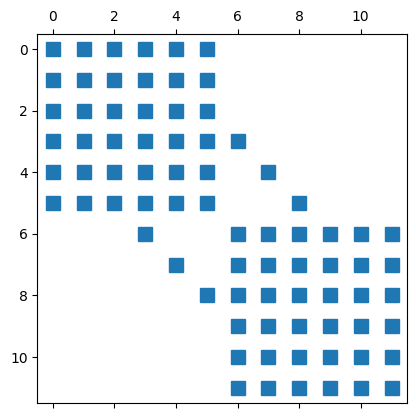

In [3]:
from matplotlib import pyplot as plt
plt.spy(systemY)

In [5]:
all_nodes = dss.Circuit.AllNodeNames()

# 4. Print all nodes.
print("List of all nodes in the circuit:")
for node in all_nodes:
    print(node)

List of all nodes in the circuit:
sourcebus.1
sourcebus.2
sourcebus.3
n2.1
n2.2
n2.3
n3.1
n3.2
n3.3
n4.1
n4.2
n4.3


In [19]:
# 4. Loop through all line elements and extract the Yprim matrix for each one.
for line in dss.Lines.AllNames():
    dss.Lines.Name(line)  # Make this line element active
    # Retrieve the Yprim matrix as a flat list of complex numbers.
    yprim_flat = dss.CktElement.YPrim()

    # 5. Get the order (dimension) of the Yprim matrix
    order = dss.CktElement.NodeOrder()
    # 5. Convert the flat list into a list of complex numbers.
    yprim_complex = []
    # Step through the list two at a time.
    for i in range(0, len(yprim_flat), 2):
        yprim_complex.append(yprim_flat[i] + 1j * yprim_flat[i+1])
    yprim_complex = np.array(yprim_complex)

    # 6. Compute the matrix size.
    # Total number of complex numbers:
    total_complex = len(yprim_complex)
    # Get the number of phases and terminals of the active element:
    nphases = dss.CktElement.NumPhases()
    nterminals = dss.CktElement.NumTerminals()
    # The matrix dimension is given by:
    mat_size = total_complex // (nphases * nterminals)

    # 7. Reshape the vector into a square matrix.
    yprim_matrix = yprim_complex.reshape(mat_size, mat_size)

    y11 = yprim_matrix[0:3,0:3]
    z11 = np.linalg.inv(y11)
    z11_per_mile = z11 / (2500 / 5280)

    # Print the resulting Yprim matrix.
    print(yprim_matrix)

KeyboardInterrupt: 

In [8]:
for source in dss.Vsources.AllNames():
    dss.Vsources.Name(source)
    yprim_flat = dss.CktElement.YPrim()
    order = dss.CktElement.NodeOrder()
    yprim_complex = []
    for i in range(0, len(yprim_flat), 2):
        yprim_complex.append(yprim_flat[i] + 1j * yprim_flat[i+1])
    yprim_complex = np.array(yprim_complex)
    total_complex = len(yprim_complex)
    nphases = dss.CktElement.NumPhases()
    nterminals = dss.CktElement.NumTerminals()
    mat_size = total_complex // (nphases * nterminals)
    yprim_matrix = yprim_complex.reshape(mat_size, mat_size)
    zprim_matrix = np.linalg.inv(yprim_matrix)
    print(zprim_matrix)

[[ 343.2684315 -1237.76604161j   31.32731086   +9.99844097j
    31.32731086   +9.99844097j -343.2684315 +1237.76604161j
   -31.32731086   -9.99844097j  -31.32731086   -9.99844097j]
 [  31.32731086   +9.99844097j  343.2684315 -1237.76604161j
    31.32731086   +9.99844097j  -31.32731086   -9.99844097j
  -343.2684315 +1237.76604161j  -31.32731086   -9.99844097j]
 [  31.32731086   +9.99844097j   31.32731086   +9.99844097j
   343.2684315 -1237.76604161j  -31.32731086   -9.99844097j
   -31.32731086   -9.99844097j -343.2684315 +1237.76604161j]
 [-343.2684315 +1237.76604161j  -31.32731086   -9.99844097j
   -31.32731086   -9.99844097j  343.2684315 -1237.76604161j
    31.32731086   +9.99844097j   31.32731086   +9.99844097j]
 [ -31.32731086   -9.99844097j -343.2684315 +1237.76604161j
   -31.32731086   -9.99844097j   31.32731086   +9.99844097j
   343.2684315 -1237.76604161j   31.32731086   +9.99844097j]
 [ -31.32731086   -9.99844097j  -31.32731086   -9.99844097j
  -343.2684315 +1237.76604161j   31

In [14]:
for load in dss.Loads.AllNames():
    dss.Loads.Name(load)
    yprim_flat = dss.CktElement.YPrim()
    order = dss.CktElement.NodeOrder()
    yprim_complex = []
    for i in range(0, len(yprim_flat), 2):
        yprim_complex.append(yprim_flat[i] + 1j * yprim_flat[i+1])
    yprim_complex = np.array(yprim_complex)
    total_complex = len(yprim_complex)
    nphases = dss.CktElement.NumPhases()
    nterminals = dss.CktElement.NumTerminals()
    mat_size = total_complex // (nphases * nterminals) - 1
    yprim_matrix = yprim_complex.reshape(mat_size, mat_size)
    zprim_matrix = np.linalg.inv(yprim_matrix)
    print(yprim_matrix)

[[ 0.31203772-0.15112677j  0.        +0.j          0.        +0.j
  -0.31203772+0.15112677j]
 [ 0.        +0.j          0.31203772-0.15112677j  0.        +0.j
  -0.31203772+0.15112677j]
 [ 0.        +0.j          0.        +0.j          0.31203772-0.15112677j
  -0.31203772+0.15112677j]
 [-0.31203772+0.15112677j -0.31203772+0.15112677j -0.31203772+0.15112677j
   0.9361141 -0.45338075j]]


In [18]:
for xfmr in dss.Transformers.AllNames():
    dss.Transformers.Name(xfmr)
    yprim_flat = dss.CktElement.YPrim()
    order = dss.CktElement.NodeOrder()
    yprim_complex = []
    for i in range(0, len(yprim_flat), 2):
        yprim_complex.append(yprim_flat[i] + 1j * yprim_flat[i+1])
    yprim_complex = np.array(yprim_complex)
    total_complex = len(yprim_complex)
    nphases = dss.CktElement.NumPhases() + 1
    nterminals = dss.CktElement.NumTerminals()
    mat_size = total_complex // (nphases * nterminals)
    yprim_matrix = yprim_complex.reshape(mat_size, mat_size)
    y11 = yprim_matrix[0:3,0:3]
    z11 = np.linalg.inv(y11)
    z11_per_mile = z11 / (2500 / 5280)
    print(yprim_matrix)

KeyboardInterrupt: 